<a href="https://colab.research.google.com/github/xexx12345/-folio/blob/master/Tensorflor_Single_Stock_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/LiamConnell/deep-algotrading/blob/master/notebooks/TF-FIN-1-singlestock_regresion.ipynb

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy.random as rng
import pandas_datareader.data as web
import numpy as np
import pandas as pd
!pip install yahoofinancials 


Populating the interactive namespace from numpy and matplotlib


In [0]:
def get_historical_data(ticker = "AAPL", start_date = "2017-11-29", end_date = "2019-11-29", time_interval = "daily"):
    '''Returns Open, High, Low, Close, Volume with Date set as an Index'''
    yahoo_financials = YahooFinancials(ticker)
    yahoo_price = yahoo_financials.get_historical_price_data(start_date, end_date, time_interval)
    yahoo_price = yahoo_price[ticker]['prices']
    df = pd.DataFrame.from_dict(yahoo_price)
    df.set_index('formatted_date', inplace = True)
    #df = df[["open","high","low","close","volume"]]
    df.index.names = ['date']
    df = df[['adjclose']]
    df = df.rename(columns = {'adjclose': ticker})
    df.to_csv("{}_{} to {}.csv".format(ticker, start_date, end_date))

    return df

In [0]:
def get_prices(symbol):
    start, end = '2007-05-02', '2016-04-11'
    data = get_historical_data(ticker = "GOOGL", start_date = start, end_date = end)
    #data=pd.DataFrame(data)
    prices=data['GOOGL']
    #prices=np.asarray(list(prices))
    prices=prices.astype(float)
    return prices

def get_returns(prices):
    return (prices-prices.shift(-1))/prices

def sort_data(rets):
    ins = []
    outs = []
    for i in range(len(rets)-100):
        ins.append(rets[i:i+100].tolist())
        outs.append(rets[i+100])
    return np.array(ins), np.array(outs)

In [0]:
# separate data into inputs and outputs for training and testing
gs = get_prices('GS')
rets = get_returns(gs)
ins, outs = sort_data(rets)
div = int(.8 * ins.shape[0])
train_ins, train_outs = ins[:div], outs[:div]
test_ins, test_outs = ins[div:], outs[div:]

In [11]:

print(test_ins)

[[-0.01016051 -0.00275744 -0.00110811 ... -0.0085723  -0.00268402
   0.00360216]
 [-0.00275744 -0.00110811  0.00395209 ... -0.00268402  0.00360216
   0.00817564]
 [-0.00110811  0.00395209  0.0026506  ...  0.00360216  0.00817564
  -0.0015717 ]
 ...
 [-0.00921846  0.01139493  0.02175726 ...  0.00591161  0.00856073
  -0.01252356]
 [ 0.01139493  0.02175726 -0.01398513 ...  0.00856073 -0.01252356
   0.01035063]
 [ 0.02175726 -0.01398513  0.00591669 ... -0.01252356  0.01035063
   0.00085516]]


In [0]:
sess = tf.InteractiveSession()

In [13]:
# we define two placeholders for our input and output
x = tf.placeholder(tf.float32, [None, 100])
y_ = tf.placeholder(tf.float32, [None, 1])

# we define trainable variables for our model
W = tf.Variable(tf.random_normal([100, 1]))
b = tf.Variable(tf.random_normal([1]))

# we define our model: y = W*x + b
y = tf.matmul(x, W) + b

#MSE:
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
# initialize variables to random values
init = tf.global_variables_initializer()
sess.run(init)
# run optimizer on entire training data set many times
for epoch in range(20000):
    sess.run(optimizer, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
    # every 1000 iterations record progress
    if (epoch+1)%1000== 0:
        c = sess.run(cost, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

Epoch: 1000 cost= 0.016899833
Epoch: 2000 cost= 0.008517079
Epoch: 3000 cost= 0.004487764
Epoch: 4000 cost= 0.002489103
Epoch: 5000 cost= 0.001472707
Epoch: 6000 cost= 0.000945117
Epoch: 7000 cost= 0.000666358
Epoch: 8000 cost= 0.000516699
Epoch: 9000 cost= 0.000435149
Epoch: 10000 cost= 0.000390082
Epoch: 11000 cost= 0.000364839
Epoch: 12000 cost= 0.000350517
Epoch: 13000 cost= 0.000342290
Epoch: 14000 cost= 0.000337509
Epoch: 15000 cost= 0.000334700
Epoch: 16000 cost= 0.000333032
Epoch: 17000 cost= 0.000332032
Epoch: 18000 cost= 0.000331427
Epoch: 19000 cost= 0.000331057
Epoch: 20000 cost= 0.000330831


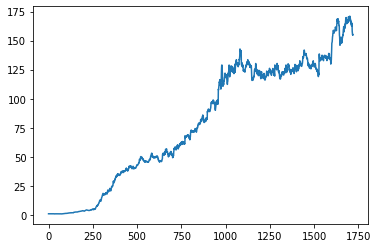

In [15]:
#train results :)
predict = y
p = sess.run(predict, feed_dict={x: train_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * train_outs
plot(np.cumprod(returns+1))

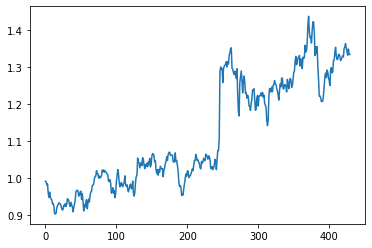

In [16]:
#test results :(
predict = y
p = sess.run(predict, feed_dict={x: test_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * test_outs
plot(np.cumprod(returns+1))